# Plotting Temperature and Precipitation Graphs of Uttar Pradesh (1989-2017)

### Importing data packages

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
data = Dataset('fwdpenta1918/2017.nc', mode='r')
print (data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2018-03-26 06:09:13 GMT by grib_to_netcdf-2.7.0: grib_to_netcdf /data/data05/scratch/_mars-atls00-95e2cf679cd58ee9b4db4dd119a05a8d-pceM8s.grib -o /data/data05/scratch/_grib2netcdf-atls17-70e05f9f8ba4e9d19932f1c45a7be8d8-vFm7N4.nc -utime
    dimensions(sizes): longitude(65), latitude(65), time(24)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 t2m(time,latitude,longitude), int16 tp(time,latitude,longitude)
    groups: 



In [3]:
data.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (65,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (65,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: hours since 1900-01-01 00:00:0.0
                  long_name: time
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (24,)
              filling on, default _FillVa

So the file contains the following Variables (shape):
- Longitude (65,)
- Latitude (65,)
- Time (24,)
- 2 metre Temperature (24, 65, 65)
- Total precipitation (24,65,65)

## Sample graph

In [4]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]
t2m = data.variables['t2m'][:,:,:]
tp = data.variables['tp'][:,:,:]
t2m = t2m[0,:,:]
tp = tp[0,:,:] 

In [10]:
for i in t2m.data:
    print (i)

[ 283.97115613  283.14621485  282.3222207   281.16862888  280.01503707
  278.86333949  277.70974768  276.55710298  275.40445828  274.09743307
  272.78946075  271.48338266  270.17541033  268.86933224  267.56135991
  266.60003339  265.639654    264.67738037  263.71700097  262.75472734
  261.79340083  261.30563417  260.81786752  260.33010086  259.84138709
  259.35456755  258.86585378  258.54383308  258.22181237  257.89884455
  257.57682385  257.25575026  256.93372956  256.78408464  256.63443973
  256.48479481  256.33704414  256.18739922  256.0377543   256.14099035
  256.24517352  256.34840957  256.4506985   256.55488167  256.65811772
  256.95172483  257.24627906  257.53988618  257.83349329  258.12804752
  258.42260175  258.77019469  259.11873475  259.46632768  259.81486774
  260.16340779  260.51194785  260.68905924  260.86617062  261.04233489
  261.2203934   261.39750479  261.57366905  261.67974646  261.78487675]
[ 284.85481882  284.1331136   283.41330261  282.41409131  281.41582713
  280

In [11]:
for i in t2m.data:
    i -= 273.15
    print (i)

[ 10.82115613   9.99621485   9.1722207    8.01862888   6.86503707
   5.71333949   4.55974768   3.40710298   2.25445828   0.94743307
  -0.36053925  -1.66661734  -2.97458967  -4.28066776  -5.58864009
  -6.54996661  -7.510346    -8.47261963  -9.43299903 -10.39527266
 -11.35659917 -11.84436583 -12.33213248 -12.81989914 -13.30861291
 -13.79543245 -14.28414622 -14.60616692 -14.92818763 -15.25115545
 -15.57317615 -15.89424974 -16.21627044 -16.36591536 -16.51556027
 -16.66520519 -16.81295586 -16.96260078 -17.1122457  -17.00900965
 -16.90482648 -16.80159043 -16.6993015  -16.59511833 -16.49188228
 -16.19827517 -15.90372094 -15.61011382 -15.31650671 -15.02195248
 -14.72739825 -14.37980531 -14.03126525 -13.68367232 -13.33513226
 -12.98659221 -12.63805215 -12.46094076 -12.28382938 -12.10766511
 -11.9296066  -11.75249521 -11.57633095 -11.47025354 -11.36512325]
[ 11.70481882  10.9831136   10.26330261   9.26409131   8.26582713
   7.26661583   6.26740453   5.27008746   4.27087616   3.00741846
   1.7420

Text(0.5,1,'2 metre temperature (1989)')

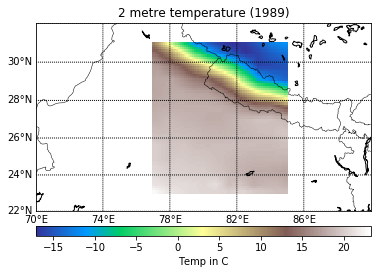

In [31]:
# Plotting T2M


map = Basemap(projection='merc',llcrnrlon=70,llcrnrlat=22,urcrnrlon=90,urcrnrlat=32, resolution='i')
lon, lat = np.meshgrid(lons, lats)
x, y = map(lon, lat)
plot = map.pcolor(x,y,np.squeeze(t2m), vmin=np.min(t2m), vmax=np.max(t2m), cmap=cm.terrain)
plot.set_edgecolor('face')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawparallels(np.arange(20,40,2),labels=[1,0,0,0])
map.drawmeridians(np.arange(70,90,4),labels=[0,0,0,1])
cbar = map.colorbar(plot, location='bottom', pad="8%")
cbar.set_label('Temp in C')
cbar.ax.tick_params(labelsize=10)
plt.title('2 metre temperature (1989)')

Text(0.5,1,'Total Precipitation (1989)')

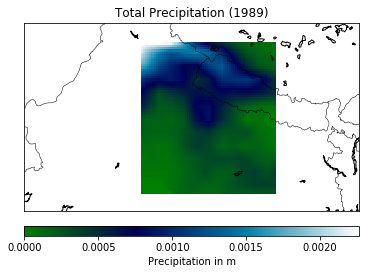

In [7]:
# Plotting TP

map = Basemap(projection='merc',llcrnrlon=70,llcrnrlat=22,urcrnrlon=90,urcrnrlat=32, resolution='i')

plot = map.pcolor(x,y,np.squeeze(tp), vmin=np.min(tp), vmax=np.max(tp), cmap=cm.ocean)
plot.set_edgecolor('face')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
cbar = map.colorbar(plot, location='bottom', pad="8%")
cbar.set_label('Precipitation in m')
cbar.ax.tick_params(labelsize=10)
plt.title('Total Precipitation (1989)')

In [8]:
def temp(file):
    plot1 = map.pcolor(x,y,np.squeeze(t2m), vmin=np.min(t2m), vmax=np.max(t2m), cmap=cm.terrain)
    map.drawcoastlines()
    map.drawstates()
    map.drawcountries()
    cbar = map.colorbar(plot1, location='bottom', size="6%", pad="8%")
    cbar.set_label('Temp in K')
    cbar.ax.tick_params(labelsize=8)
    file = file[13:-3]
    plt.title('2 metre temperature {0}'.format(file))
    plt.savefig("output/T2M_{0}.png".format(file))
    cbar = None
    
def precipitation(file):
    plot2 = map.pcolor(x,y,np.squeeze(tp), vmin=np.min(tp), vmax=np.max(tp), cmap=cm.terrain)
    map.drawcoastlines()
    map.drawstates()
    map.drawcountries()
    cb = map.colorbar(plot2, location='bottom', size="6%", pad="8%")
    cb.set_label('Precipitation in m')
    cb.ax.tick_params(labelsize=8)
    file = file[13:-3]
    plt.title('Total Precipitation {0}'.format(file))
    plt.savefig("output/TP_{0}.png".format(file)) 
    cb = None

In [9]:
for file in glob.glob('fwdpenta1918/*'):
    data = Dataset(file, mode='r')
    lons = data.variables['longitude'][:]
    lats = data.variables['latitude'][:]
    t2m = data.variables['t2m'][:,:,:]
    tp = data.variables['tp'][:,:,:]
    t2m = t2m[0,:,:]
    tp = tp[0,:,:] 
    
    # Plotting t2m and tp
    map = Basemap(projection='merc', llcrnrlon=70, llcrnrlat=22, urcrnrlon=90, urcrnrlat=32, resolution='i') 
    lon, lat = np.meshgrid(lons, lats)
    x, y = map(lon, lat)
    temp(file)
    precipitation(file)

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


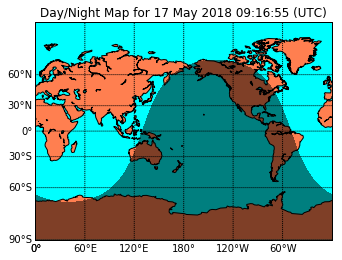

In [17]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

TypeError: drawparallels() missing 1 required positional argument: 'circles'

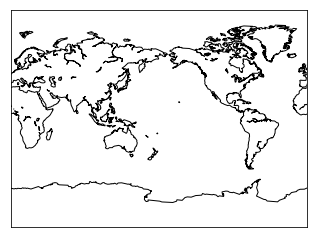

In [23]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
# date = datetime.utcnow()
# CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()